In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('cardio_train.csv')

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.800457
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.762620
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [12]:
df.groupby('gender')['id'].count()

gender
1    45530
2    24470
Name: id, dtype: int64

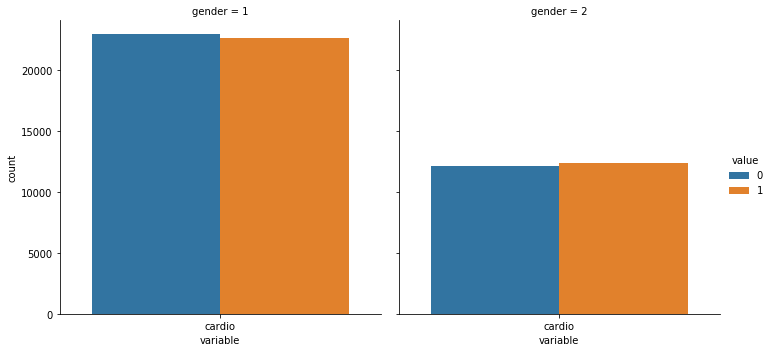

In [5]:
df_gen = pd.melt(df, id_vars=['gender'], value_vars=['cardio'])
sns.catplot(x="variable", hue="value", col="gender",
                data=df_gen, kind="count");

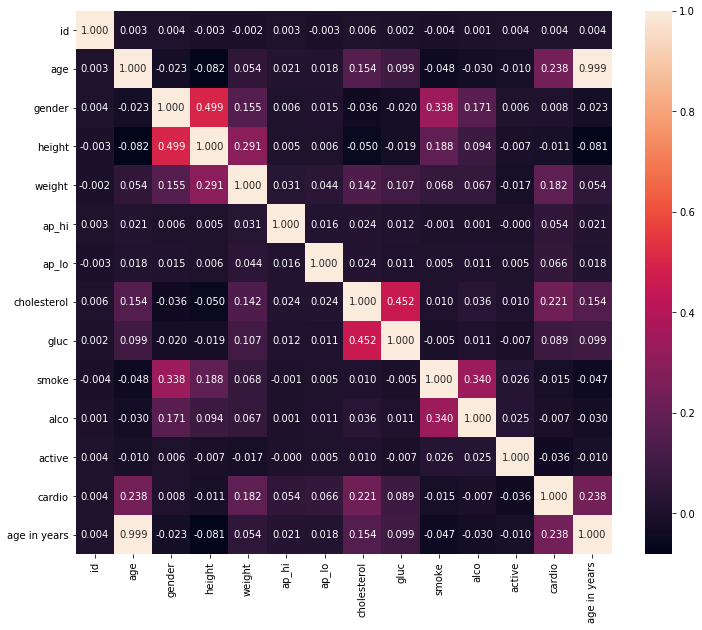

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, fmt = '.3f')

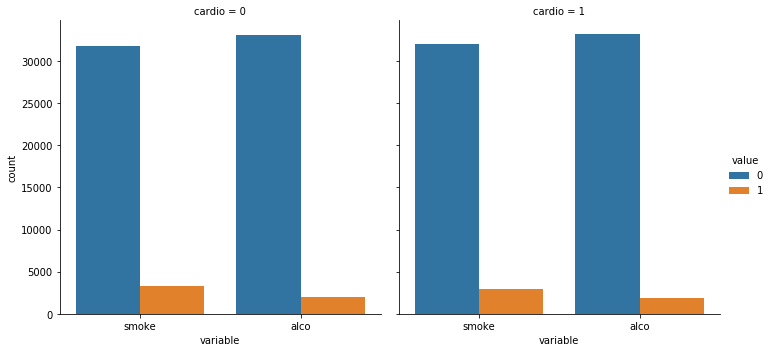

In [16]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['smoke', 'alco'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

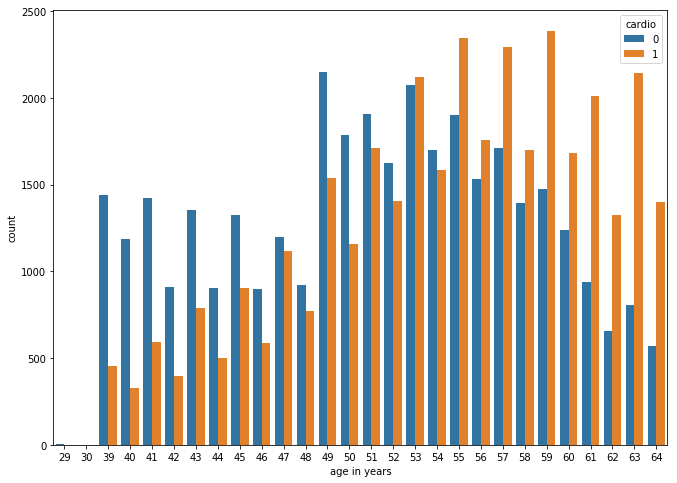

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(data=df, x="age in years", hue="cardio")

In [22]:
target_name = 'cardio'
df_target = df[target_name]
df = df.drop([target_name], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size = 0.3, random_state = 42)

In [29]:
from sklearn.metrics import classification_report, auc, roc_curve 

In [48]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
lm_predict = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("1. Logistic Regression")
print("=== Model Accuracy ===")
acc_lm=accuracy_score(lm_predict,y_test)
print(acc_lm)
print('\n')
print("=== Confusion Matrix ===")
cm_lm = confusion_matrix(lm_predict,y_test)
print(cm_lm)

1. Logistic Regression
=== Model Accuracy ===
0.7080952380952381


=== Confusion Matrix ===
[[7782 3451]
 [2679 7088]]


In [30]:
print("=== Classification Report ===")
print(classification_report(y_test, lm_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_lm,recall_lm,thresholds_lm = roc_curve(y_test, lm_predict)
auc_lm=auc(fpr_lm, recall_lm)
print('AUC: %.2f' % auc_lm)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.74      0.72     10461
           1       0.73      0.67      0.70     10539

   micro avg       0.71      0.71      0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



=== All AUC Scores ===
AUC: 0.71


In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,y_train)
dtree_predict = dtree.predict(X_test)

# Check the accuracy score and confusion matrix
print("2. Decision Tree")
print("=== Model Accuracy ===")
acc_dtree=accuracy_score(dtree_predict,y_test)
print(acc_dtree)
print('\n')
print("=== Confusion Matrix ===")
cm_dtree = confusion_matrix(dtree_predict,y_test)
print(cm_dtree)

2. Decision Tree
=== Model Accuracy ===
0.7248095238095238


=== Confusion Matrix ===
[[8052 3370]
 [2409 7169]]


In [44]:
print("=== Classification Report ===")
print(classification_report(y_test, dtree_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_dtree, recall_dtree, thresholds_dtree = roc_curve(y_test, dtree_predict)
auc_dtree=auc(fpr_dtree, recall_dtree)
print('AUC: %.2f' % auc_dtree)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10461
           1       0.75      0.68      0.71     10539

   micro avg       0.72      0.72      0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



=== All AUC Scores ===
AUC: 0.72


In [105]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)

# Check the accuracy score and confusion matrix
print("3. eXtreme Gradient Boosting(XGBoost)")
print("=== Model Accuracy ===")
acc_xgb=accuracy_score(xgb_predict,y_test)
print(acc_xgb)
print('\n')
print("=== Confusion Matrix ===")
cm_xgb = confusion_matrix(xgb_predict,y_test)
print(cm_xgb)

3. eXtreme Gradient Boosting(XGBoost)
=== Model Accuracy ===
0.7394761904761905


=== Confusion Matrix ===
[[8093 3103]
 [2368 7436]]


In [103]:
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_xgb, recall_xgb, thresholds_xgb = roc_curve(y_test, xgb_predict)
auc_xgb=auc(fpr_xgb, recall_xgb)
print('AUC: %.2f' % auc_xgb)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     10461
           1       0.76      0.71      0.73     10539

   micro avg       0.74      0.74      0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



=== All AUC Scores ===
AUC: 0.74


In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, oob_score=False, n_jobs=-1, min_samples_leaf=1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

# Check the accuracy score and confusion matrix
print("4. Random Forest")
print("=== Model Accuracy ===")
acc_rfc=accuracy_score(rfc_predict,y_test)
print(acc_rfc)
print('\n')
print("=== Confusion Matrix ===")
cm_rfc = confusion_matrix(rfc_predict,y_test)
print(cm_rfc)

4. Random Forest
=== Model Accuracy ===
0.7280952380952381


=== Confusion Matrix ===
[[7840 3089]
 [2621 7450]]


In [104]:
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_rfc, recall_rfc, thresholds_rfc = roc_curve(y_test, rfc_predict)
auc_rfc=auc(fpr_rfc, recall_rfc)
print('AUC: %.2f' % auc_rfc)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     10461
           1       0.74      0.71      0.72     10539

   micro avg       0.73      0.73      0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



=== All AUC Scores ===
AUC: 0.73


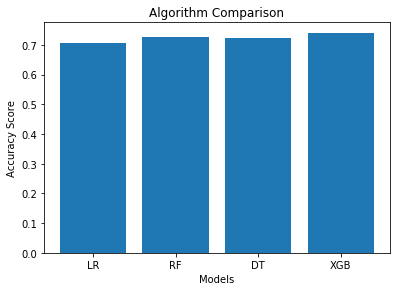

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
algo = ['LR','RF', 'DT', 'XGB']
acc = [0.708,0.727,0.724,0.739]
ax.bar(algo,acc)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Algorithm Comparison')
plt.show()